<a href="https://colab.research.google.com/github/amaanhash/Profanity-Filter-for-kids-using-video-sharing-platform/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install youtube_transcript_api
!pip install youtube-transcript-downloader
#!pip install youtube_transcript_api.formatters

In [ ]:
!pip install -r"/content/drive/MyDrive/model/requests.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.4/442.4 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.1/694.1 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for httpretty: filename=httpretty-1.1.4-py3-none-any.whl size=28791 sha256=40f65d4a209720240a8460c7283d50e6c73d26b2142ef573fcd26bbd20d58fab
  Stored in directory: /root/.cache/pip/wheels/17/84/74/456da302b40f8d81976edc741ba0a04bf64fd4bb3c58aca9fb
  Created wheel for coverage: filename=coverage-5.2.1-cp310-cp310-linux_x86_64.whl size=233915 sha256=1b256a080d0fd7811efdae01ff77d5f88fdcb4f8c7154aa74277cedb4b5253ec
  Stored in directory: /root/.cache/pip/wheels/6b/ce/76/cb886c97ff226f543bdc5f7bc97d3d7c7aae9f06c1083af3af
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=bd5232fe21697dba1e378e7c849a9f6d1f071c0e807f0570acee70f0a0ba5535
  Stored in directory

In [ ]:
from pickle import TRUE
from youtube_transcript_api import YouTubeTranscriptApi
from youtube_transcript_api.formatters import TextFormatter
import requests
import re
import os

def get_video_id(youtube_url):
    """
    Extract the video ID from a YouTube URL.
    Args:
        youtube_url (str): The YouTube URL.
    Returns:
        str: The extracted video ID or None if not found.
    """
    pattern = r'(?:https?:\/\/)?(?:www\.)?(?:youtube\.com\/(?:[^\/\n\s]+\/\S+\/|(?:v|e(?:mbed)?)\/|\S*?[?&]v=)|youtu\.be\/)([a-zA-Z0-9_-]{11})'
    match = re.search(pattern, youtube_url)
    return match.group(1) if match else None

def get_video_title(video_id):
    """
    Get the title of the YouTube video.
    Args:
        video_id (str): The YouTube video ID.
    Returns:
        str: The title of the video or "Unknown" if not found.
    """
    url = f"https://www.youtube.com/watch?v={video_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        matches = re.findall(r'<title>(.*?)</title>', response.text)
        return matches[0].replace(" - YouTube", "") if matches else "Unknown"
    except requests.RequestException as e:
        print(f"Error fetching video title: {e}")
        return "Unknown"

def download_transcript(video_id):
    """
    Download the transcript and return as a string.
    Args:
        video_id (str): The YouTube video ID.
    Returns:
        str: The transcript text or an empty string if an error occurs.
    """
    try:
        transcript_list = YouTubeTranscriptApi.list_transcripts(video_id)
        transcript = transcript_list.find_generated_transcript(['en'])

        formatter = TextFormatter()
        transcript_text = formatter.format_transcript(transcript.fetch())

        # Remove timecodes and speaker names
        transcript_text = re.sub(r'\[\d+:\d+:\d+\]', '', transcript_text)
        transcript_text = re.sub(r'<\w+>', '', transcript_text)
        return transcript_text
    except Exception as e:
        print(f"Error downloading transcript: {e}")
        return ""

def main():
    youtube_url = input("Enter the YouTube video link: ")
    video_id = get_video_id(youtube_url)

    if video_id:
        transcript_text = download_transcript(video_id)
        if transcript_text:
            video_title = get_video_title(video_id)
            file_name = f"{video_id}_{video_title}.txt"
            file_name = re.sub(r'[\\/*?:"<>|]', '', file_name)  # Remove invalid characters

            with open(file_name, 'w', encoding='utf-8') as file:
                file.write(transcript_text)

            print(f"Transcript saved to {file_name}")
        else:
            print("Unable to download transcript.")
    else:
        print("Invalid YouTube URL.")

if __name__ == "__main__":
    main()

Enter the YouTube video link: https://www.youtube.com/watch?v=oshjts0D4Cg&ab_channel=Law%26CrimeTrials
Transcript saved to oshjts0D4Cg_Prosecutor Slams New Jersey Father for Child’s Alleged Murder.txt


In [ ]:
import urllib.request
#import json

In [ ]:
model = load_model('/content/drive/MyDrive/model/agedetectionmodelnew.h5')

In [ ]:
def get_image_features(image):


    img = load_img(image,color_mode = "grayscale")
    img = img.resize((128,128), Image.LANCZOS)

    img = np.array(img)
    img = img.reshape(1,128,128,1)
    img = img/255.0
    return img

1/1 [==============================] - 0s 71ms/step


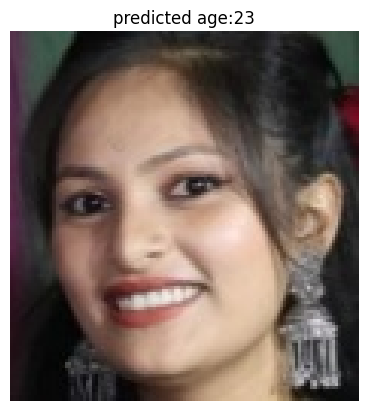

In [ ]:
img_to_test ='/content/drive/MyDrive/model/test2.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)
age =  round(pred[1][0][0])

plt.title(f'predicted age:{age}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

In [ ]:
def read_text():
    # Get the file path from the user
    filepath = input("Enter the file path: ")

    # Try to open and read the file
    try:
        with open(filepath, "r") as file:
            contents_of_file = file.read()


        check_profanity(contents_of_file, age)
    except FileNotFoundError:
        print("Error: File not found or unable to open the file.")

def check_profanity(text_to_check, age):
    # List of profane words to check against
    profane_words = ["idiot", "stupid", "shit", "minger","murder"]

    # Split the text into words and check for profanity
    words = text_to_check.split()
    profane_words_found = set(words).intersection(profane_words)

    if profane_words_found:
        if age < 18:
            print("The age detected is", age, "which is less than 18.")
            print("This text contains language not suitable for minors.")
        else:
            print("Profane words found in the text.but user is an adult could recommend")
    else:
        print("No profane words found.")

# Call the read_text function to start the process
read_text()

Enter the file path: /content/oshjts0D4Cg_Prosecutor Slams New Jersey Father for Child’s Alleged Murder.txt
Profane words found in the text.but user is an adult could recommend


In [ ]:
def get_image_features(image):


    img = load_img(image,color_mode = "grayscale")
    img = img.resize((128,128), Image.LANCZOS)

    img = np.array(img)
    img = img.reshape(1,128,128,1)
    img = img/255.0
    return img

1/1 [==============================] - 0s 94ms/step


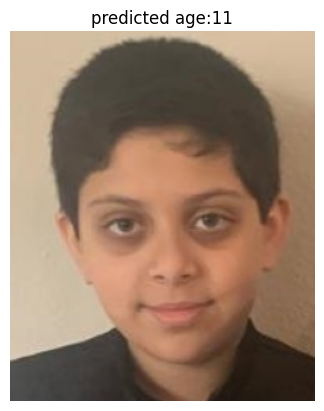

In [ ]:
img_to_test ='/content/drive/MyDrive/model/test1.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)
age1 =  round(pred[1][0][0])

plt.title(f'predicted age:{age1}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

In [ ]:
def read_text():
    # Get the file path from the user
    filepath = input("Enter the file path: ")

    # Try to open and read the file
    try:
        with open(filepath, "r") as file:
            contents_of_file = file.read()


        check_profanity(contents_of_file, age)
    except FileNotFoundError:
        print("Error: File not found or unable to open the file.")

def check_profanity(text_to_check, age):
    # List of profane words to check against
    profane_words = ["idiot", "stupid", "shit", "minger","murder"]

    # Split the text into words and check for profanity
    words = text_to_check.split()
    profane_words_found = set(words).intersection(profane_words)

    if profane_words_found:
        if age1 < 18:
            print("The age detected is", age1, "which is less than 18.")
            print("This text contains language not suitable for minors.")
        else:
            print("Profane words found in the text.but user is an adult could recommend")
    else:
        print("No profane words found.")

# Call the read_text function to start the process
read_text()

Enter the file path: /content/oshjts0D4Cg_Prosecutor Slams New Jersey Father for Child’s Alleged Murder.txt
The age detected is 11 which is less than 18.
This text contains language not suitable for minors.
